# Congressional Voting Records Data Set

This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).

Attribute Information:
Class Name: 2 (democrat, republican) 

handicapped-infants: 2 (y,n) 

water-project-cost-sharing: 2 (y,n) 

adoption-of-the-budget-resolution: 2 (y,n) 

physician-fee-freeze: 2 (y,n) 

el-salvador-aid: 2 (y,n) 

religious-groups-in-schools: 2 (y,n) 

anti-satellite-test-ban: 2 (y,n) 

aid-to-nicaraguan-contras: 2 (y,n) 

mx-missile: 2 (y,n) 

immigration: 2 (y,n) 

synfuels-corporation-cutback: 2 (y,n) 

education-spending: 2 (y,n) 

superfund-right-to-sue: 2 (y,n) 

crime: 2 (y,n) 

duty-free-exports: 2 (y,n) 

export-administration-act-south-africa: 2 (y,n)

URL:https://archive.ics.uci.edu/ml/datasets/congressional+voting+records


# Section 2: Loading the dataset and preprocessing of data

In [1]:
import pandas as pd
import numpy as np
dataframe1 = pd.read_csv("E:\Tranparent machine learning\CongressDataset.csv")

Replacing the missing value "?" with NaN and then converting the String values into Boolean( as Scikit Learn decision tree classifier works only with numeric or boolean values) and after that replacing all the NaN values with mode of that particular column( We can also drop the rows having NaN values but that may lead to potential data loss).

In [2]:
dataframe2 = dataframe1.replace('?',np.NaN)
for column in dataframe2.columns:
    dataframe2[column].fillna(dataframe2[column].mode()[0], inplace=True)

Converting all the feautres into bianry Values

In [3]:
dataframe2['Class'] = dataframe2['Class'].map(lambda x : "y" if x == "democrat" else "n")
dataframe2 = dataframe2.applymap(lambda x:1 if x == "y" else 0)

Making a copy of dataset and then spiliting it into training and test data

In [4]:
dataframe3 = dataframe2.copy(deep = True)

Removing the column which is to predicted from the dataset

In [5]:
del dataframe3['Class']

Spilting dataset into training and test data

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dataframe3, dataframe2['Class'], test_size = 0.33,random_state = 1)

C:\Users\sunvi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Logistic Regression using L2 penalty

In [7]:
from sklearn import linear_model
logistic_l2 = linear_model.LogisticRegression(penalty='l2')
logistic_l2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
features_sorted_orig_l2 = np.argsort(np.abs(logistic_l2.coef_[0]))[::-1]


In [9]:
feature_name = dataframe3.columns
total = 0
for i in features_sorted_orig_l2:
    if total == 10:
        break
    else:
        print("%s\t%0.3f" %(feature_name[i], logistic_l2.coef_[0][i]))
        total = total + 1

physician-fee-freeze	-3.343
synfuels-corporation-cutback	1.814
adoption-of-the-budget-resolution	1.391
mx-missile	0.952
duty-free-exports	0.840
immigration	-0.765
education-spending	-0.754
water-project-cost-sharing	0.713
aid-to-nicaraguan-contras	-0.471
el-salvador-aid	-0.438


# # Logistic Regression using L1 penalty

In [10]:
logistic_l1 = linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
features_sorted_orig_l1 = np.argsort(np.abs(logistic_l1.coef_[0]))[::-1]
feature_name = dataframe3.columns
total = 0
for i in features_sorted_orig_l1:
    if total == 10:
        break
    else:
        print("%s\t%0.3f" %(feature_name[i], logistic_l1.coef_[0][i]))
        total = total + 1

physician-fee-freeze	-4.971
synfuels-corporation-cutback	2.706
adoption-of-the-budget-resolution	1.467
duty-free-exports	0.788
immigration	-0.732
mx-missile	0.664
education-spending	-0.613
water-project-cost-sharing	0.516
handicapped-infants	0.048
export-administration-act-south-africa	0.000


# Decision Tree classifier

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

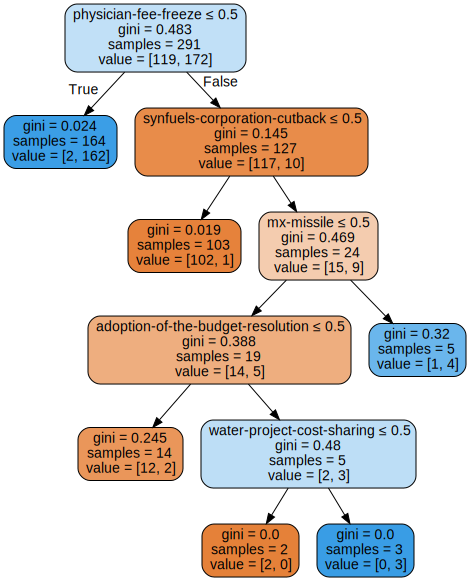

In [13]:
decision_tree = DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
decision_tree.fit(X_train, y_train)
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                         feature_names=list(dataframe3),  
                      #   class_names=list(dataframe2['Class'],  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

While using L2 penalty for logistic regression   L1 penalty for logistic regression        Important feature DTC

physician-fee-freeze	-3.343                   physician-fee-freeze	-4.975             physician-fee-freeze 
synfuels-corporation-cutback	1.814            synfuels-corporation-cutback	2.708     synfuels-corporation-cutbc           
adoption-of-the-budget-resolution	1.391        adoption-of-the-budget-resolution	1.464  mx-missile
mx-missile	0.952                                duty-free-exports	0.786                  adopting of budget resolution
duty-free-exports	0.840                        immigration -0.733                        anit-satellite-test-ban

Here we can see that top3 features for both L1 and L2 remains the same but we can see that L2 is assigning lower weight to features as comapred to L1 because as we know that L2 penalizes the square of the weight, So it L2 assign lowers weight to the coefficient. L2 tries to minimize the weight of the bigger values because the bigger weight adds more to penalty.


Comparing with the decison tree we see that top-2 feature remaines the same but the third spilting feature is different as comapred to Logistic regression both L1 and L2 .




# Z-scoring data

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
z_score_X_train = scaler.fit_transform(X_train)
z_score_X_test = scaler.transform(X_test)


In [15]:
a = {}

a['X_train'] = z_score_X_train

a['y_train'] = y_train

a['X_test'] = z_score_X_test

a['y_test'] = y_test

a['target_names'] = [0,1]

a['feature_names'] = dataframe3.columns

import pickle

pickle.dump(a, open("vbimal.pickle", "wb")) # replace username with your username

# Logistic Regression using L2 penalty after Z-scoring data

In [16]:
logistic_l2_z_score = linear_model.LogisticRegression(penalty='l2')
logistic_l2_z_score.fit(z_score_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
features_sorted_orig_l2_z_score = np.argsort(np.abs(logistic_l2_z_score.coef_[0]))[::-1]
feature_name = dataframe3.columns
total = 0
for i in features_sorted_orig_l2_z_score:
    if total == 10:
        break
    else:
        print("%s\t%0.3f" %(feature_name[i], logistic_l2_z_score.coef_[0][i]))
        total = total + 1

physician-fee-freeze	-2.447
synfuels-corporation-cutback	1.283
adoption-of-the-budget-resolution	0.893
immigration	-0.674
aid-to-nicaraguan-contras	-0.665
duty-free-exports	0.572
education-spending	-0.498
mx-missile	0.427
water-project-cost-sharing	0.393
el-salvador-aid	-0.392


# Logistic Regression using L1 penalty after Z-scoring data

In [18]:
logistic_l1_z_score = linear_model.LogisticRegression(penalty='l1')
logistic_l1_z_score.fit(z_score_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
features_sorted_orig_l1_z_score = np.argsort(np.abs(logistic_l1_z_score.coef_[0]))[::-1]
feature_name = dataframe3.columns
total = 0
for i in features_sorted_orig_l1_z_score:
    if total == 10:
        break
    else:
        print("%s\t%0.3f" %(feature_name[i], logistic_l1_z_score.coef_[0][i]))
        total = total + 1

physician-fee-freeze	-2.888
synfuels-corporation-cutback	1.497
adoption-of-the-budget-resolution	0.791
immigration	-0.659
duty-free-exports	0.503
education-spending	-0.483
aid-to-nicaraguan-contras	-0.427
water-project-cost-sharing	0.272
superfund-right-to-sue	-0.251
mx-missile	0.217


# Decision tree after Z-scoring data

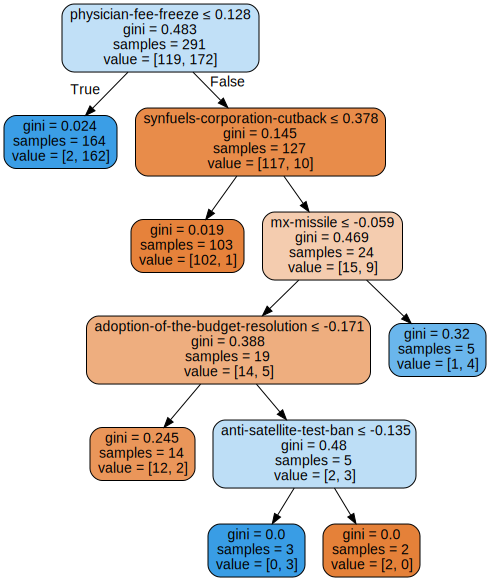

In [20]:
decision_tree = DecisionTreeClassifier(max_depth=6,min_impurity_decrease=0.005)
decision_tree.fit(z_score_X_train, y_train)
import graphviz
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                         feature_names=list(dataframe3),  
                      #   class_names=list(dataframe2['Class'],  
                         filled=True, rounded=True,
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

After doing the Z-scoring we can observe that the weight assigned by L1 and L2 descreaes as comapred to weight wihtout Z-scoring.
The top three feature for L2 remains the same but there is a change in top feature after that.
Before Z-scoring mx-missile which was the 8 the feature in L2 it moved up and become the 4th feature after Z-scoring.

In L1 penalty also we can see that mx-missile which was 6th importnt feature before Z-scoring it moved to 10Th position after Z-scoring.

However there is very small changes  in the decision tree,almost all the spilitng feature remains the same(the last feature is different but we can see that both the feature have same gini index) and also gini-index remains the same for all the features.

In [21]:
prob_per_instance = logistic_l2_z_score.predict_proba(z_score_X_test)


In [22]:
def evidence_calculator(Object):
    positive_evidence =[]
    negative_evidence =[]
    total_evidence = []
    for i,value in enumerate(Object):
        evidence = value*logistic_l2_z_score.coef_[0][i]
#        print(logistic_l2_z_score.coef_[0][i])
        if evidence > 0:
            positive_evidence.append(evidence)
        elif evidence < 0:
            negative_evidence.append(evidence)
        total_evidence.append(evidence)
    return (positive_evidence,negative_evidence,total_evidence)
            

# Most positive object with respect to probabilities

In [23]:
print ("The most positive object:\n",z_score_X_test[(np.argmax(prob_per_instance[:,1]))])
pos_evidence, neg_evidence,total_evidence = evidence_calculator(z_score_X_test[np.argmax(prob_per_instance[:,1])])
total_pos_evidence = 0;
total_neg_evidence = 0;
for i in pos_evidence:
    total_pos_evidence = total_pos_evidence + i
for j in neg_evidence:
    total_neg_evidence = total_neg_evidence + j
index = np.argmax(prob_per_instance[:,1])    

print("\ntotal Postive evidence:", total_pos_evidence)
print("\n\ntotal Negative evidence:", total_neg_evidence)
print("\n\nProbability distribution:",prob_per_instance[index] )
sorted_evidence_index = np.argsort(total_evidence)
#print(sorted_evidence_index)
print("top 3 positive feature")
total = 1
for i in sorted_evidence_index[::-1]:
    
    if total_evidence[i] > 0 and total < 4:
        print(feature_name[i])
        total = total +1
print("\n")
print("top 3 negative features are:")
total = 1
for i in sorted_evidence_index:
    if total_evidence[i] < 0 and total < 4:
        print(feature_name[i])
        total = total +1


The most positive object:
 [-0.84366149  0.89858412  0.84366149 -0.87999446  0.96288749  0.75694978
 -1.14434427 -1.21949969 -1.06022997 -1.03142125  1.44766871 -0.85565347
 -1.08242403 -1.25507818  1.21949969  0.43330717]

total Postive evidence: 8.40087132074


total Negative evidence: -0.829565534791


Probability distribution: [  1.48627568e-04   9.99851372e-01]
top 3 positive feature
physician-fee-freeze
synfuels-corporation-cutback
aid-to-nicaraguan-contras


top 3 negative features are:
mx-missile
el-salvador-aid


# Most negative object with respect to probabilities

In [24]:
print ("The most negative object:\n",z_score_X_test[(np.argmax(prob_per_instance[:,0]))])
pos_evidence, neg_evidence,total_evidence = evidence_calculator(z_score_X_test[(np.argmax(prob_per_instance[:,0]))])
total_pos_evidence = 0;
total_neg_evidence = 0;
for i in pos_evidence:
    total_pos_evidence = total_pos_evidence + i
for j in neg_evidence:
    total_neg_evidence = total_neg_evidence + j
index = np.argmax(prob_per_instance[:,0])    

print("\ntotal Postive evidence:", total_pos_evidence)
print("\n\ntotal Negative evidence:", total_neg_evidence)
print("\n\nProbability distribution:",prob_per_instance[index] )
sorted_evidence_index = np.argsort(total_evidence)
#print(sorted_evidence_index)
print("top 3 positive feature")
total = 1

for i in sorted_evidence_index[::-1]:
    
    if total_evidence[i] > 0 and total < 4:
        print(feature_name[i])
        total = total +1
print("\n")
print("top 3 negative features are:")
total = 1
for i in sorted_evidence_index:
    if total_evidence[i] < 0 and total < 4:
        print(feature_name[i])
        total = total +1

The most negative object:
 [-0.84366149 -1.11286187 -1.18530953  1.13637079  0.96288749 -1.3210916
  0.8738629   0.82000841 -1.06022997  0.96953597 -0.69076578  1.16869742
  0.92385236  0.79676311 -0.82000841  0.43330717]

total Postive evidence: 0.0183431946786


total Negative evidence: -8.7691255467


Probability distribution: [  9.99451717e-01   5.48283382e-04]
top 3 positive feature
export-administration-act-south-africa
handicapped-infants


top 3 negative features are:
physician-fee-freeze
adoption-of-the-budget-resolution
synfuels-corporation-cutback


# The Object having the Highest Positive evidence

In [25]:
positive_evidence_list = []
negative_evidence_list = []
overall_total_evidence = []
for i in range(0,len(z_score_X_test)):
    
    total_pos_evidence = 0;
    total_neg_evidence = 0;
    
    pos_evidence, neg_evidence,total_evidence = evidence_calculator(z_score_X_test[i])
    for i in pos_evidence:
        total_pos_evidence = total_pos_evidence + i
    for j in neg_evidence:
        total_neg_evidence = total_neg_evidence + j
    positive_evidence_list.append(total_pos_evidence)
    negative_evidence_list.append(total_neg_evidence)
    overall_total_evidence.append(total_evidence)

evidence = np.array(overall_total_evidence)
positive_evidence = np.array(positive_evidence_list)
negative_evidence = np.array(negative_evidence_list)
print("\n\n The object having highest evidence", z_score_X_test[np.argmax(positive_evidence)])
print("\n\nThe total positive evidence:",np.amax(positive_evidence) )
print("\n\nThe total negaitve evidence:", negative_evidence[np.argmax(positive_evidence)])
print("\n\nThe probability distribution",prob_per_instance[np.argmax(positive_evidence)])
total_evidence = overall_total_evidence[np.argmax(positive_evidence)]
sorted_evidence_index = np.argsort(total_evidence)
#print(sorted_evidence_index)
print("top 3 positive feature")
total = 1

for i in sorted_evidence_index[::-1]:
    
    if total_evidence[i] > 0 and total < 4:
        print(feature_name[i])
        total = total +1
print("\n")
print("top 3 negative features are:")
total = 1
for i in sorted_evidence_index:
    if total_evidence[i] < 0 and total < 4:
        print(feature_name[i])
        total = total +1

#pos_log_evidence, neg_log_evidence = log_evidence_calulator(X_test.iloc[np.argmax(positive_log_evidence)])



 The object having highest evidence [-0.84366149  0.89858412  0.84366149 -0.87999446  0.96288749  0.75694978
 -1.14434427 -1.21949969 -1.06022997 -1.03142125  1.44766871 -0.85565347
 -1.08242403 -1.25507818  1.21949969  0.43330717]


The total positive evidence: 8.40087132074


The total negaitve evidence: -0.829565534791


The probability distribution [  1.48627568e-04   9.99851372e-01]
top 3 positive feature
physician-fee-freeze
synfuels-corporation-cutback
aid-to-nicaraguan-contras


top 3 negative features are:
mx-missile
el-salvador-aid


# The object that has the largest (in magnitude) negative evidence.

In [26]:
positive_evidence_list = []
negative_evidence_list = []
overall_total_evidence = []
for i in range(0,len(z_score_X_test)):
    
    total_pos_evidence = 0;
    total_neg_evidence = 0;
    pos_evidence, neg_evidence ,total_evidence = evidence_calculator(z_score_X_test[i])
    for i in pos_evidence:
        total_pos_evidence = total_pos_evidence + i
    for j in neg_evidence:
        total_neg_evidence = total_neg_evidence + j
    positive_evidence_list.append(total_pos_evidence)
    negative_evidence_list.append(total_neg_evidence)
    overall_total_evidence.append(total_evidence)

positive_evidence = np.array(positive_evidence_list)
negative_evidence = np.array(negative_evidence_list)
print("n\n\The object having highest negative  evidence", z_score_X_test[np.argmax(np.absolute(negative_evidence))])
print("\n\nThe total positive evidence:",positive_evidence[np.argmax(np.absolute(negative_evidence))])
print("\n\nThe total negaitve evidence:", np.amin(negative_evidence))
print("\n\nThe probability distribution",prob_per_instance[np.argmax(np.absolute(negative_evidence))])
total_evidence = overall_total_evidence[np.argmax(np.absolute(negative_evidence))]
sorted_evidence_index = np.argsort(total_evidence)
#print(sorted_evidence_index)
print("top 3 positive feature")
total = 1

for i in sorted_evidence_index[::-1]:
    
    if total_evidence[i] > 0 and total < 4:
        print(feature_name[i])
        total = total +1
print("\n")
print("top 3 negative features are:")
total = 1
for i in sorted_evidence_index:
    if total_evidence[i] < 0 and total < 4:
        print(feature_name[i])
        total = total +1

n
\The object having highest negative  evidence [-0.84366149 -1.11286187 -1.18530953  1.13637079  0.96288749 -1.3210916
  0.8738629   0.82000841 -1.06022997  0.96953597 -0.69076578  1.16869742
  0.92385236  0.79676311 -0.82000841  0.43330717]


The total positive evidence: 0.0183431946786


The total negaitve evidence: -8.7691255467


The probability distribution [  9.99451717e-01   5.48283382e-04]
top 3 positive feature
export-administration-act-south-africa
handicapped-infants


top 3 negative features are:
physician-fee-freeze
adoption-of-the-budget-resolution
synfuels-corporation-cutback


# The most uncertain object (the probabilities are closest to 0.5)

In [27]:
most_uncertain_prob = prob_per_instance[:,0] - prob_per_instance[:,1]
#np.min(np.absolute(most_uncertain_prob))
print("The most uncertain object \n", z_score_X_test[np.argmin(np.absolute(most_uncertain_prob))])

pos_evidence, neg_evidence,total_evidence = evidence_calculator(z_score_X_test[np.argmin(np.absolute(most_uncertain_prob))])
total_pos_evidence = 0;
total_neg_evidence = 0;
for i in pos_evidence:
    total_pos_evidence = total_pos_evidence + i
for j in neg_evidence:
    total_neg_evidence = total_neg_evidence + j
index = np.argmin(np.absolute(most_uncertain_prob))

print("\n\ntotal Postive log evidence:", total_pos_evidence)
print("\n\ntotal Negative log evidence:", total_neg_evidence)
print("\n\nProbability distribution:",prob_per_instance[index] )
sorted_evidence_index = np.argsort(total_evidence)
#print(sorted_evidence_index)
print("top 3 positive feature")
total = 1

for i in sorted_evidence_index[::-1]:
    
    if total_evidence[i] > 0 and total < 4:
        print(feature_name[i])
        total = total +1
print("\n")
print("top 3 negative features are:")
total = 1
for i in sorted_evidence_index:
    if total_evidence[i] < 0 and total < 4:
        print(feature_name[i])
        total = total +1


The most uncertain object 
 [ 1.18530953  0.89858412 -1.18530953  1.13637079  0.96288749  0.75694978
 -1.14434427 -1.21949969 -1.06022997 -1.03142125  1.44766871 -0.85565347
  0.92385236  0.79676311 -0.82000841  0.43330717]


total Postive log evidence: 4.32864499729


total Negative log evidence: -5.52835078092


Probability distribution: [ 0.48927497  0.51072503]
top 3 positive feature
synfuels-corporation-cutback
aid-to-nicaraguan-contras
immigration


top 3 negative features are:
physician-fee-freeze
adoption-of-the-budget-resolution
duty-free-exports
